In [2]:
import pandas as pd

#Data Collection

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",
                 names = ["id number","refractive_index","sodium","magnesium","aluminium","silicon","potassium","calcium","barium","iron","type_of_glass"])
"""Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps"""

'Type of glass: (class attribute)\n-- 1 building_windows_float_processed\n-- 2 building_windows_non_float_processed\n-- 3 vehicle_windows_float_processed\n-- 4 vehicle_windows_non_float_processed (none in this database)\n-- 5 containers\n-- 6 tableware\n-- 7 headlamps'

In [4]:
df.head()

,id number,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.tail()

,id number,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [7]:
df.drop(columns=['id number'],inplace=True)

In [8]:
df.head()

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive_index  214 non-null    float64
 1   sodium            214 non-null    float64
 2   magnesium         214 non-null    float64
 3   aluminium         214 non-null    float64
 4   silicon           214 non-null    float64
 5   potassium         214 non-null    float64
 6   calcium           214 non-null    float64
 7   barium            214 non-null    float64
 8   iron              214 non-null    float64
 9   type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df.isnull().sum()

refractive_index    0
sodium              0
magnesium           0
aluminium           0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [11]:
df.describe()

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df.corr()

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
refractive_index,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
sodium,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
magnesium,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
aluminium,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
silicon,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
potassium,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
calcium,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
barium,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
iron,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
type_of_glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [13]:
df['refractive_index'].value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: refractive_index, Length: 178, dtype: int64

In [14]:
df['type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

In [15]:
df.drop_duplicates()

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Data Visualization and Distribution of datas

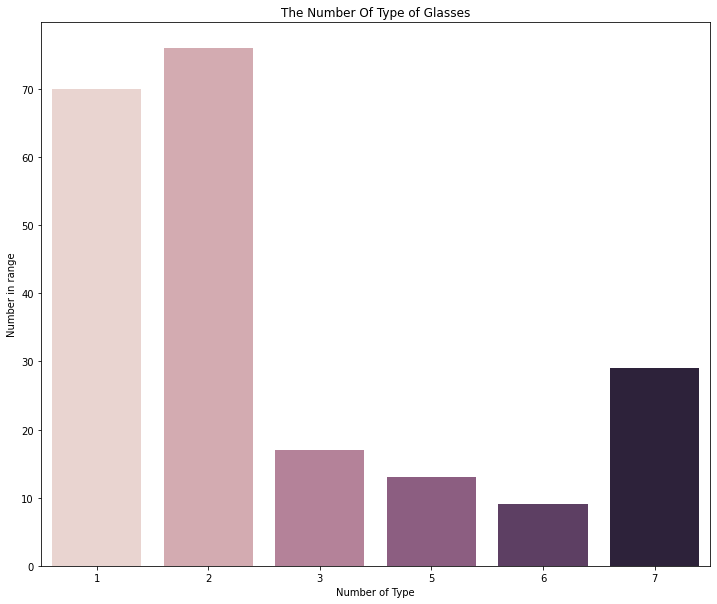

In [16]:
dataType = df["type_of_glass"].value_counts(dropna=False)
dataTypedf = np.array(dataType)
x = list(dataTypedf)
y = df.type_of_glass.value_counts().index

plt.figure(figsize=(12,10))
sns.barplot(x = y, y = x, palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Number of Type")
plt.ylabel("Number in range")
plt.title("The Number Of Type of Glasses")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

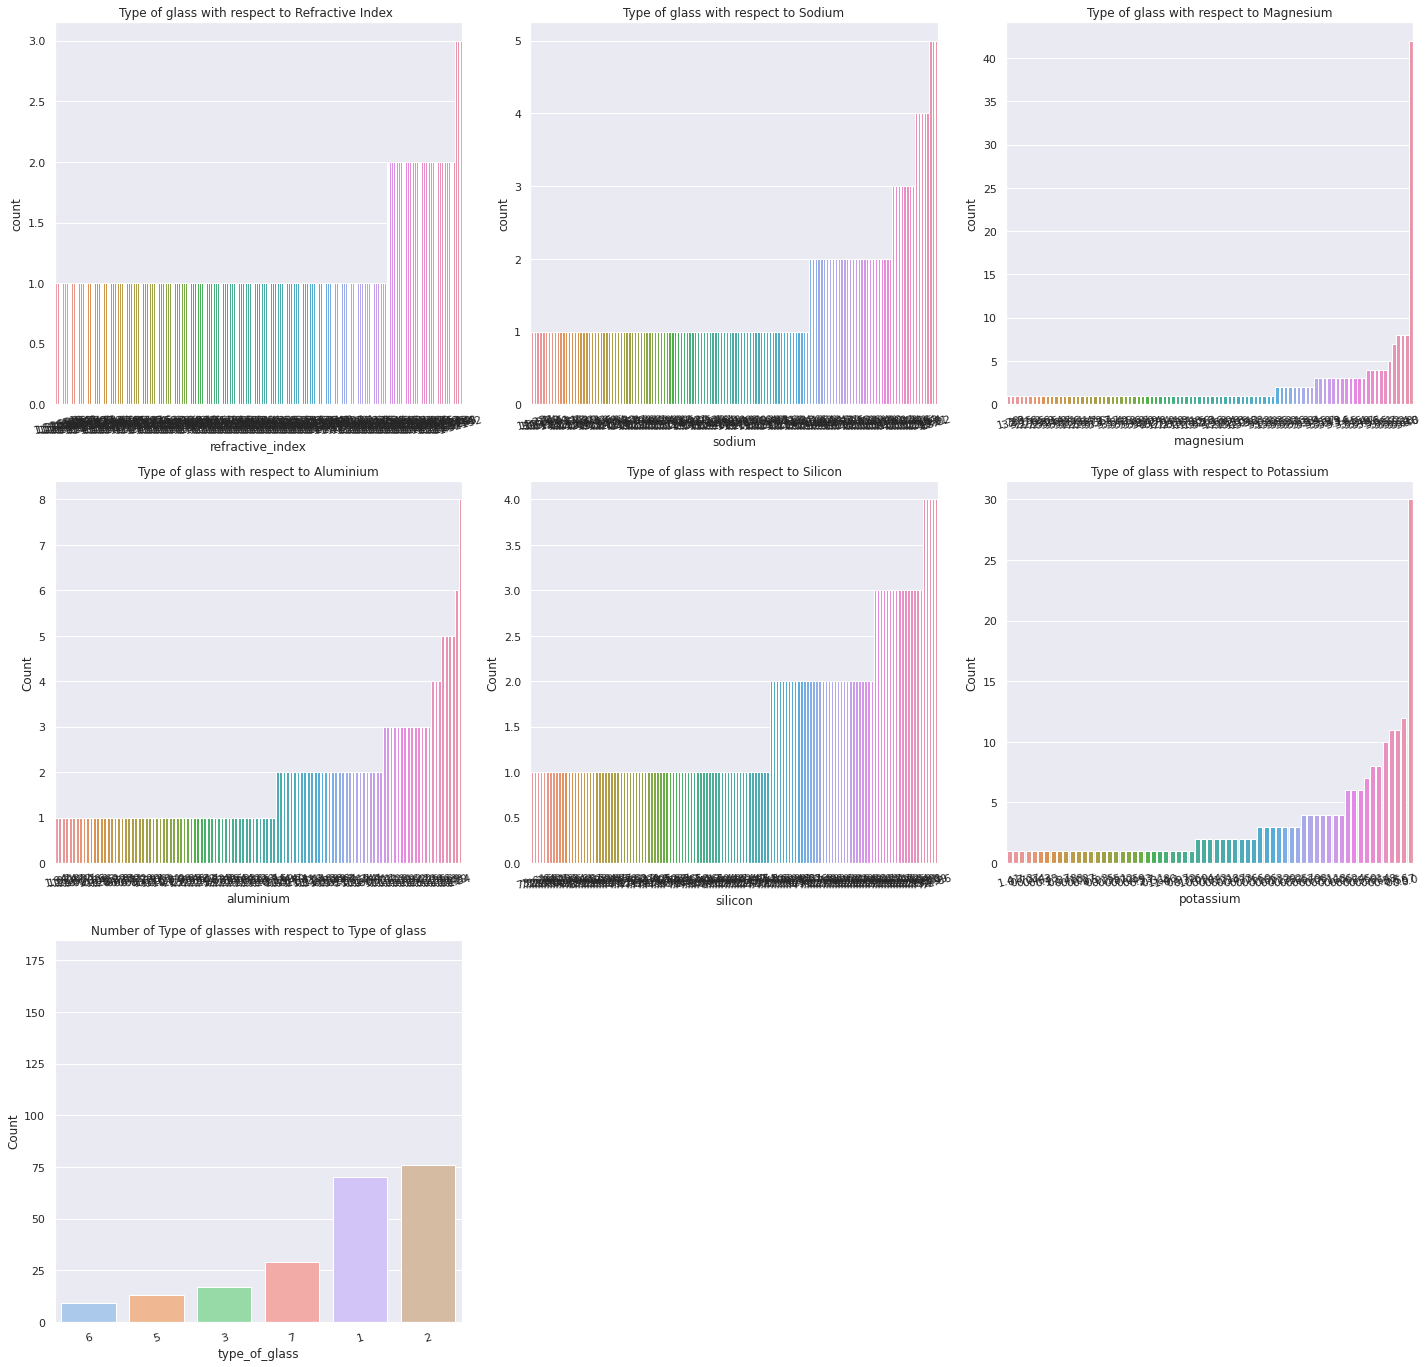

In [17]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['refractive_index'],order=df['refractive_index'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('refractive_index')
plt.ylabel('count')
plt.title('Type of glass with respect to Refractive Index ')

plt.subplot(432)
sns.countplot(df['sodium'],order=df['sodium'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('sodium')
plt.ylabel('count')
plt.title('Type of glass with respect to Sodium')

plt.subplot(433)
sns.countplot(df['magnesium'],order=df['magnesium'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('magnesium')
plt.ylabel('count')
plt.title('Type of glass with respect to Magnesium')

plt.subplot(434)
sns.countplot(df['aluminium'],order=df['aluminium'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('aluminium')
plt.ylabel('Count')
plt.title('Type of glass with respect to Aluminium')

plt.subplot(435)
sns.countplot(df['silicon'],order=df['silicon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('silicon')
plt.ylabel('Count')
plt.title('Type of glass with respect to Silicon')

plt.subplot(436)
sns.countplot(df['potassium'],order=df['potassium'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('potassium')
plt.ylabel('Count')
plt.title('Type of glass with respect to Potassium')

plt.subplot(437)
sns.countplot(df['calcium'],order=df['calcium'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('calcium')
plt.ylabel('Count')
plt.title('Type of glass with respect to Calcium')

plt.subplot(437)
sns.countplot(df['barium'],order=df['barium'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('calcium')
plt.ylabel('Count')
plt.title('Type of glass with respect to Barium')

plt.subplot(437)
sns.countplot(df['iron'],order=df['iron'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('iron')
plt.ylabel('Count')
plt.title('Type of glass with respect to Iron')

plt.subplot(437)
sns.countplot(df['type_of_glass'],order=df['type_of_glass'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('type_of_glass')
plt.ylabel('Count')
plt.title('Number of Type of glasses with respect to Type of glass')

plt.tight_layout()

Relationship between data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'Iron vs Type ')

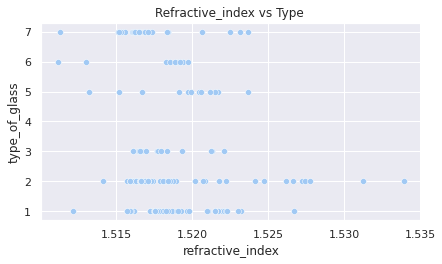

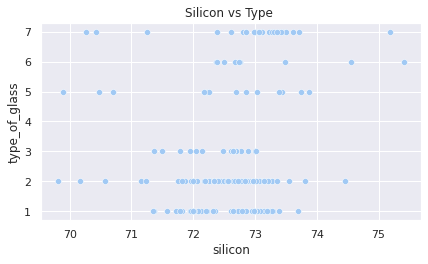

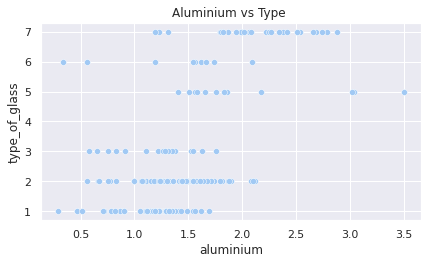

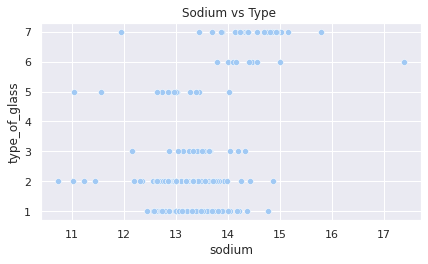

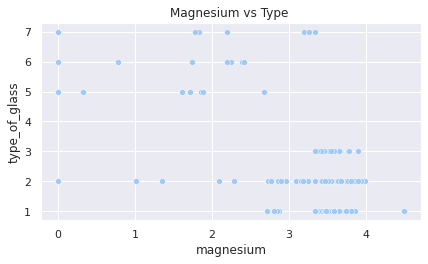

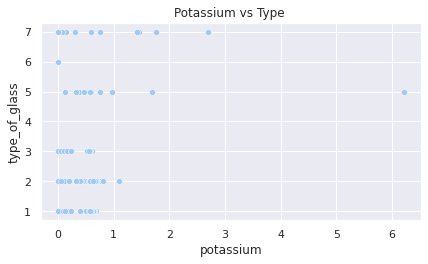

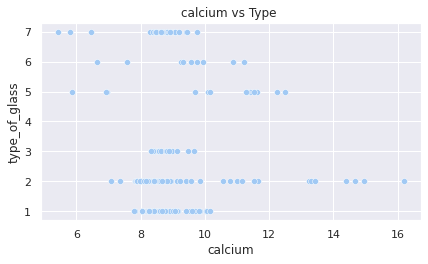

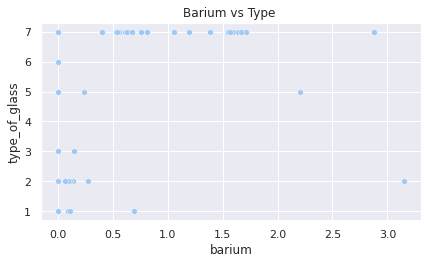

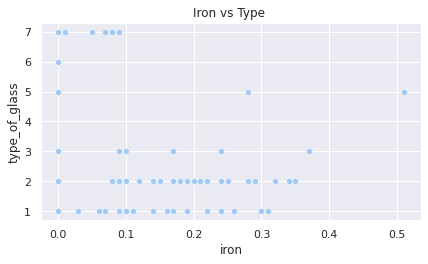

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.scatterplot(df['refractive_index'],df['type_of_glass'])
plt.xlabel('refractive_index') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Refractive_index vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['silicon'],df['type_of_glass'])
plt.xlabel('silicon') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Silicon vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['aluminium'],df['type_of_glass'])
plt.xlabel('aluminium') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Aluminium vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['sodium'],df['type_of_glass'])
plt.xlabel('sodium') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Sodium vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['magnesium'],df['type_of_glass'])
plt.xlabel('magnesium') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Magnesium vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['potassium'],df['type_of_glass'])
plt.xlabel('potassium') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Potassium vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['calcium'],df['type_of_glass'])
plt.xlabel('calcium') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("calcium vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['barium'],df['type_of_glass'])
plt.xlabel('barium') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Barium vs Type ")

plt.figure(figsize=(15,8))
plt.subplot(222)
sns.scatterplot(df['iron'],df['type_of_glass'])
plt.xlabel('iron') #Feature plot
plt.ylabel('type_of_glass') # Target plot
plt.title("Iron vs Type ")

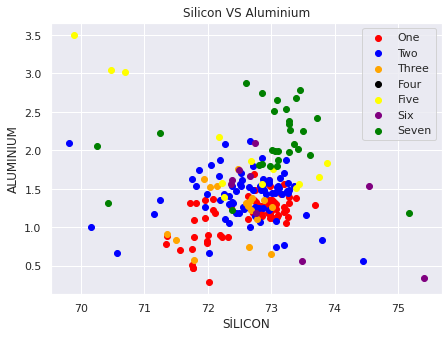

In [19]:
One = df[df.type_of_glass == 1]
Two = df[df.type_of_glass == 2]
Three = df[df.type_of_glass == 3]
Four = df[df.type_of_glass == 4]
Five = df[df.type_of_glass == 5]
Six = df[df.type_of_glass == 6]
Seven = df[df.type_of_glass == 7]

plt.figure(figsize=(7,5))
plt.scatter(One.silicon, One.aluminium, color = "red", label = "One")
plt.scatter(Two.silicon, Two.aluminium, color = "blue", label = "Two")
plt.scatter(Three.silicon, Three.aluminium, color = "orange", label = "Three")
plt.scatter(Four.silicon, Four.aluminium, color = "black", label = "Four")
plt.scatter(Five.silicon, Five.aluminium, color = "yellow", label = "Five")
plt.scatter(Six.silicon, Six.aluminium, color = "purple", label = "Six")
plt.scatter(Seven.silicon, Seven.aluminium, color = "green", label = "Seven")
plt.xlabel("SİLICON")
plt.ylabel("ALUMINIUM")
plt.title("Silicon VS Aluminium")
plt.legend()
plt.show()

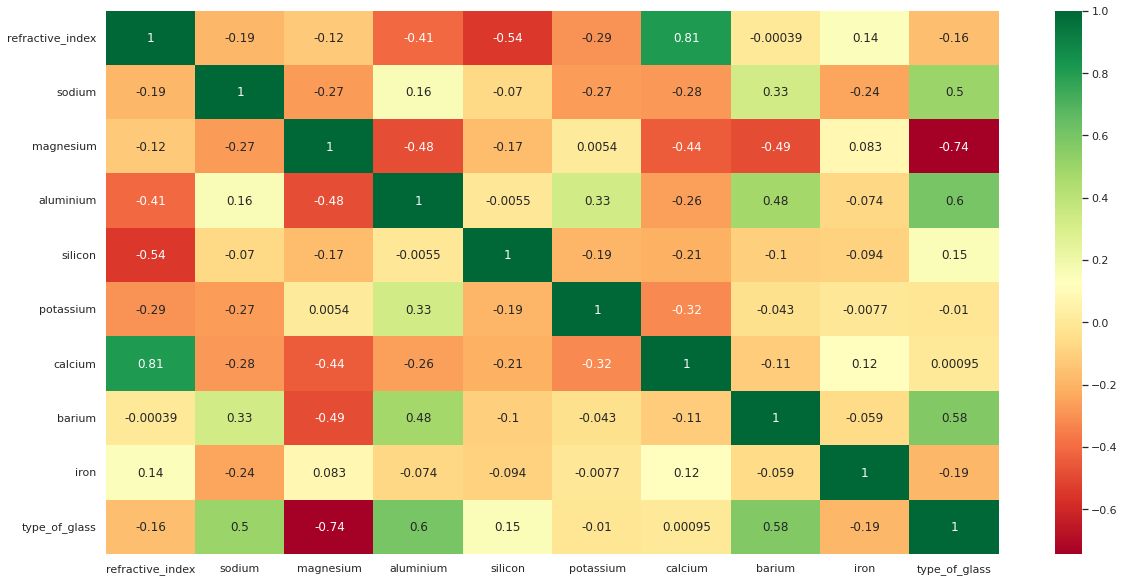

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

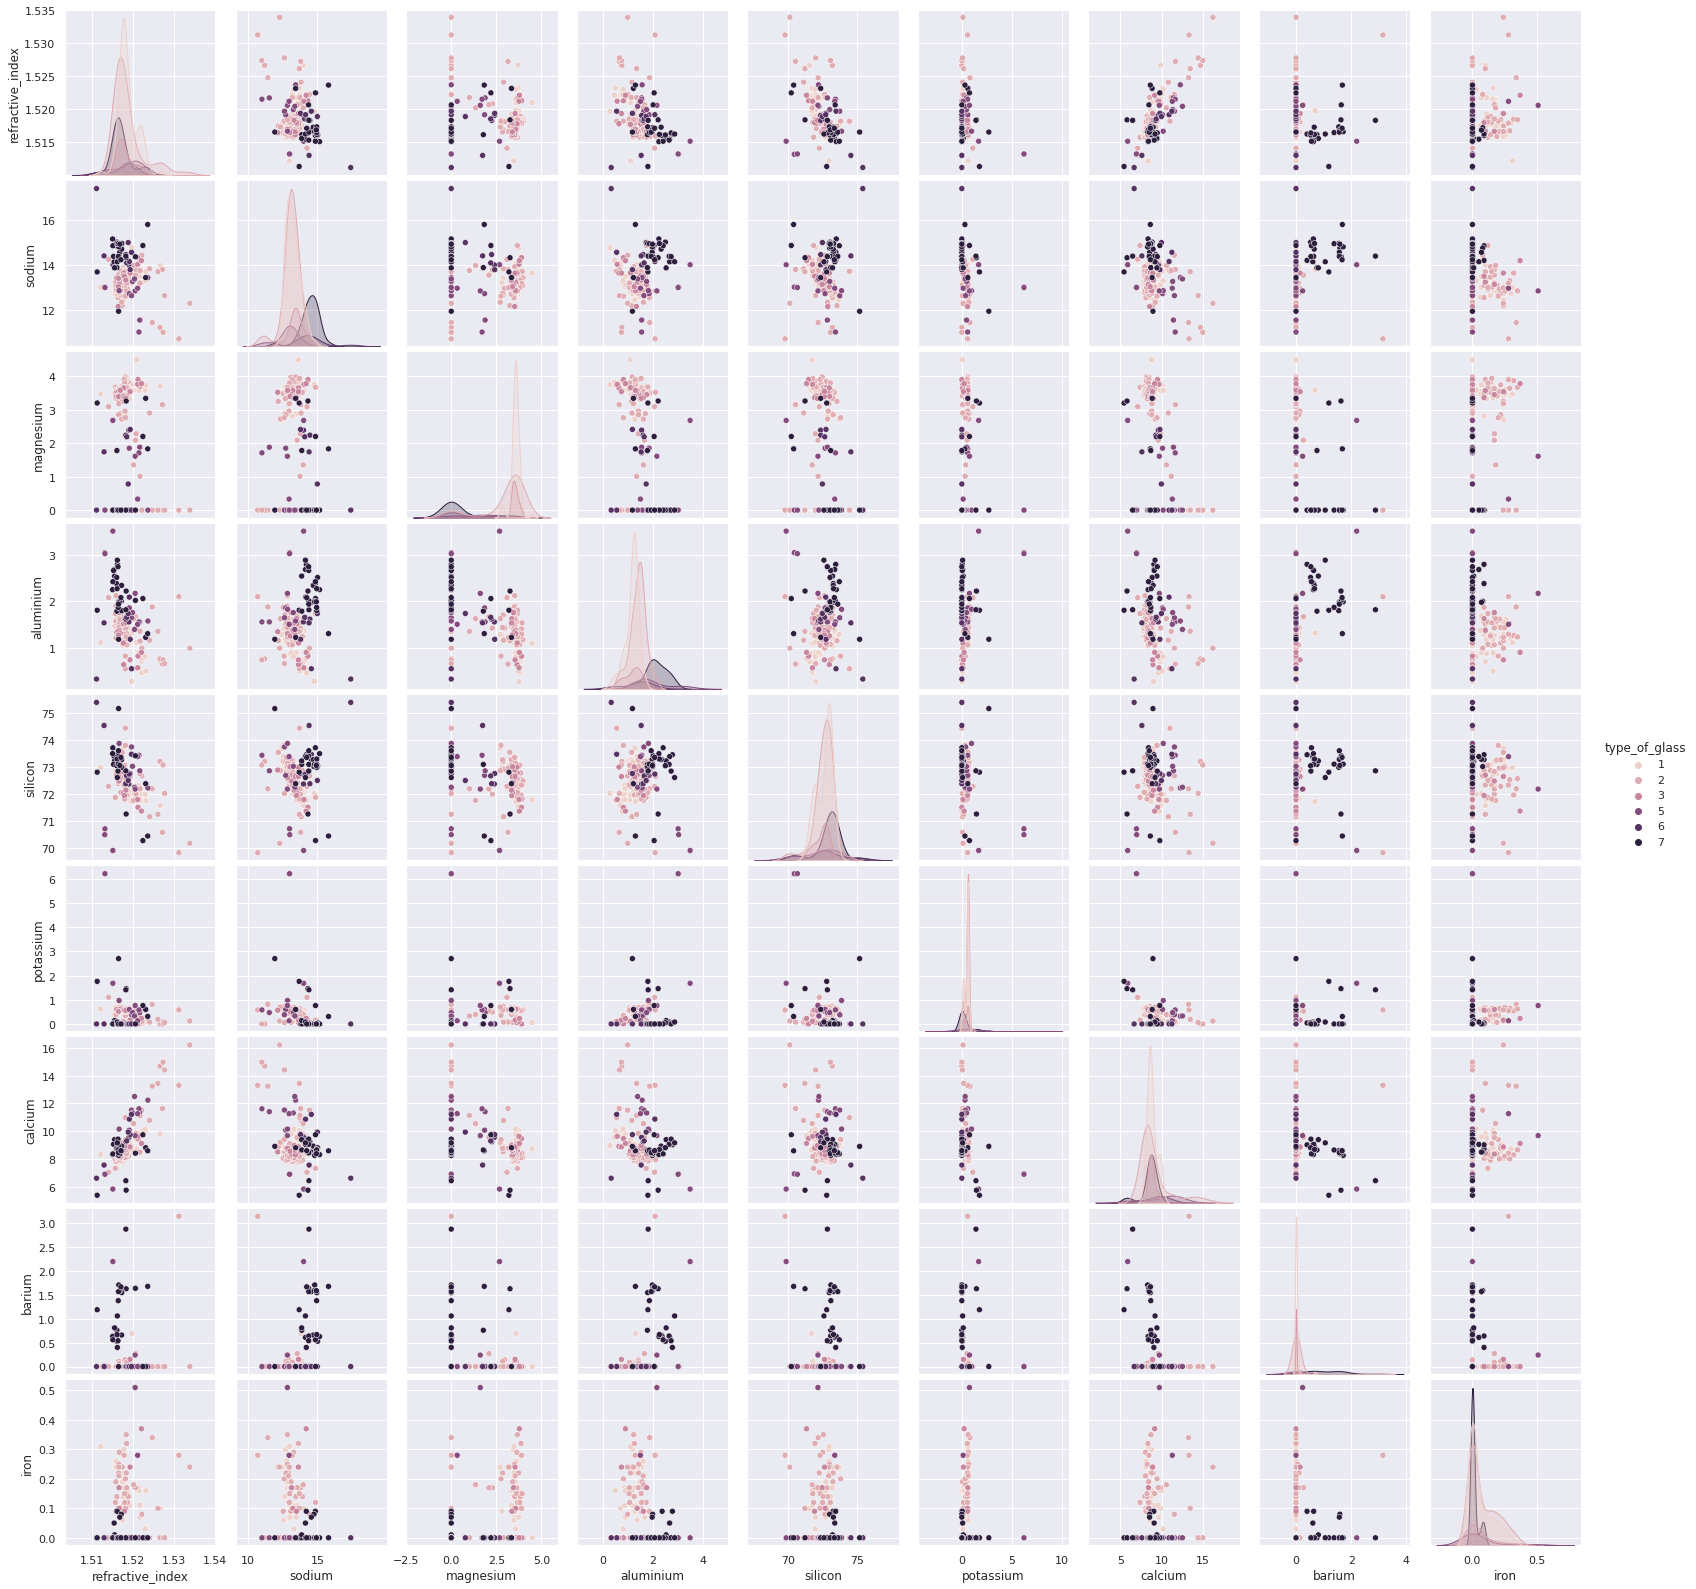

In [21]:
sns.pairplot(df, hue = 'type_of_glass')

In [22]:
target_corr = pd.DataFrame(df[df.columns[:]].corr()['type_of_glass'][:]).T
target_corr

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
type_of_glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.0


In [28]:
x = df.drop(["type_of_glass"],axis = 1)
y = df.type_of_glass.values

In [24]:
x

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [25]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 5124)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(171, 9) (43, 9) (171,) (43,)


Normalization/Scaling the data

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)
x_train,x_test

(array([[ 1.84694051,  0.04749151,  0.47126574, ..., -0.06057741,
         -0.36123517, -0.5870835 ],
        [ 0.88782886, -0.66013194, -0.75839485, ...,  0.59709843,
          0.18175641,  4.42555417],
        [-2.25820663, -0.49222129,  0.56366798, ..., -0.42343305,
         -0.36123517,  2.45981391],
        ...,
        [-0.84752879, -0.37228511,  0.64896236, ..., -0.81652665,
         -0.36123517, -0.5870835 ],
        [-0.48552945, -0.08443829,  0.61342303, ..., -0.60486086,
         -0.36123517, -0.5870835 ],
        [-0.08621059, -0.79206173,  0.57077584, ..., -0.1739698 ,
         -0.36123517, -0.5870835 ]]),
 array([[ 1.49986898e+00,  1.23485965e+00, -1.90276106e+00,
         -9.15737994e-01, -3.93971909e-03, -5.66873992e-01,
          1.97292606e+00, -3.61235171e-01,  1.99212604e-01],
        [-6.53467290e-01,  1.84653416e+00, -1.90276106e+00,
          8.00674906e-01,  5.45609182e-01, -7.00752935e-01,
         -1.81529288e-01,  2.76096642e+00, -5.87083502e-01],
        [ 4

#Normalizing data

In [30]:
x = (x- np.min(x))/(np.max(x) - np.min(x)).values
x

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


Splitting the data for modelling

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [32]:
x_train.shape,x_test.shape

((149, 9), (65, 9))

Modelling the data using KNN Classification 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)  #since seven type of glass in dataset

knn.fit(x_train, y_train)

prediction = knn.predict(x_test)

print("{} knn score: {}".format(7,knn.score(x_test, y_test)))


7 knn score: 0.7230769230769231


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


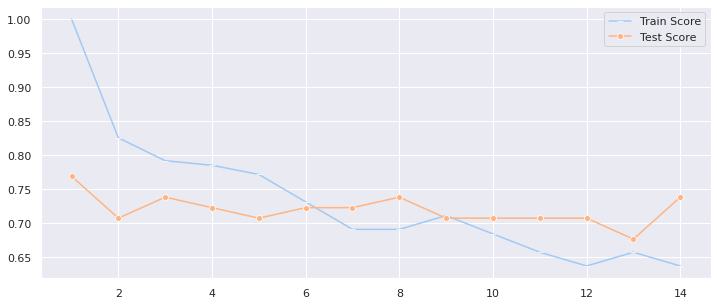

In [34]:
test_score_list = []
train_score_list = []

for i in range(1,15):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(x_train, y_train)
    test_score_list.append(knn1.score(x_test, y_test))
    train_score_list.append(knn1.score(x_train, y_train))
    
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_score_list,marker='_',label='Train Score')
p = sns.lineplot(range(1,15),test_score_list,marker='o',label='Test Score')

In [35]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,parameter_grid,cv=5)
knn_cv.fit(x_test,y_test)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Best Score:0.6923076923076923
Best Parameters: {'n_neighbors': 7}
